# EDA on Sentiment Data


In [1]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client
INFO:ekorpkit.base:Google Colab not detected.


version: 0.1.35+0.g69734d6.dirty
is notebook? True
is colab? False
evironment varialbles:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


In [2]:
start_year = 1999
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Load datasets


In [3]:
tone_data_lm = eKonf.load_data("fomc_tone_data_lm.parquet", data_dir)
tone_data_lm


polarity_mean_beigebook  polarity_mean_meeting_script  \
date                                                                
1990-02-07                      NaN                     -0.087583   
1990-03-27                      NaN                     -0.171992   
1990-05-15                      NaN                     -0.116052   
1990-07-03                      NaN                     -0.114829   
1990-08-21                      NaN                     -0.209552   
...                             ...                           ...   
2021-11-30                      NaN                           NaN   
2021-12-01                -0.046022                           NaN   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_mean_minutes  polarity_mean_press_conf  \
date                                                          
1990-02-07                    NaN                       NaN   
1990-03-27                    NaN                       NaN   
1990-05-15                    NaN                       NaN   
1990-07-03                    NaN                       NaN   
1990-08-21                    NaN                       NaN   
...                           ...                       ...   
2021-11-30                    NaN                       NaN   
2021-12-01                    NaN                       NaN   
2021-12-02                    NaN                       NaN   
2021-12-15              -0.043929                 -0.075441   
2021-12-17                    NaN                       NaN   

            polarity_mean_speech  polarity_mean_statement  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30             -0.167014                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02             -0.077381                      NaN   
2021-12-15                   NaN                 0.166667   
2021-12-17             -0.356613                      NaN   

            polarity_mean_testimony  polarity_diffusion_beigebook  \
date                                                                
1990-02-07                      NaN                           NaN   
1990-03-27                      NaN                           NaN   
1990-05-15                      NaN                           NaN   
1990-07-03                      NaN                           NaN   
1990-08-21                      NaN                           NaN   
...                             ...                           ...   
2021-11-30                    -0.12                           NaN   
2021-12-01                      NaN                     -0.048109   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
date                                                                        
1990-02-07                          -0.095663                         NaN   
1990-03-27                          -0.179702                         NaN   
1990-05-15                          -0.125461                         NaN   
1990-07-03                          -0.117794                         NaN   
1990-08-21                          -0.219403                         NaN   
...                                       ...                  

## Plot the sentiment scores


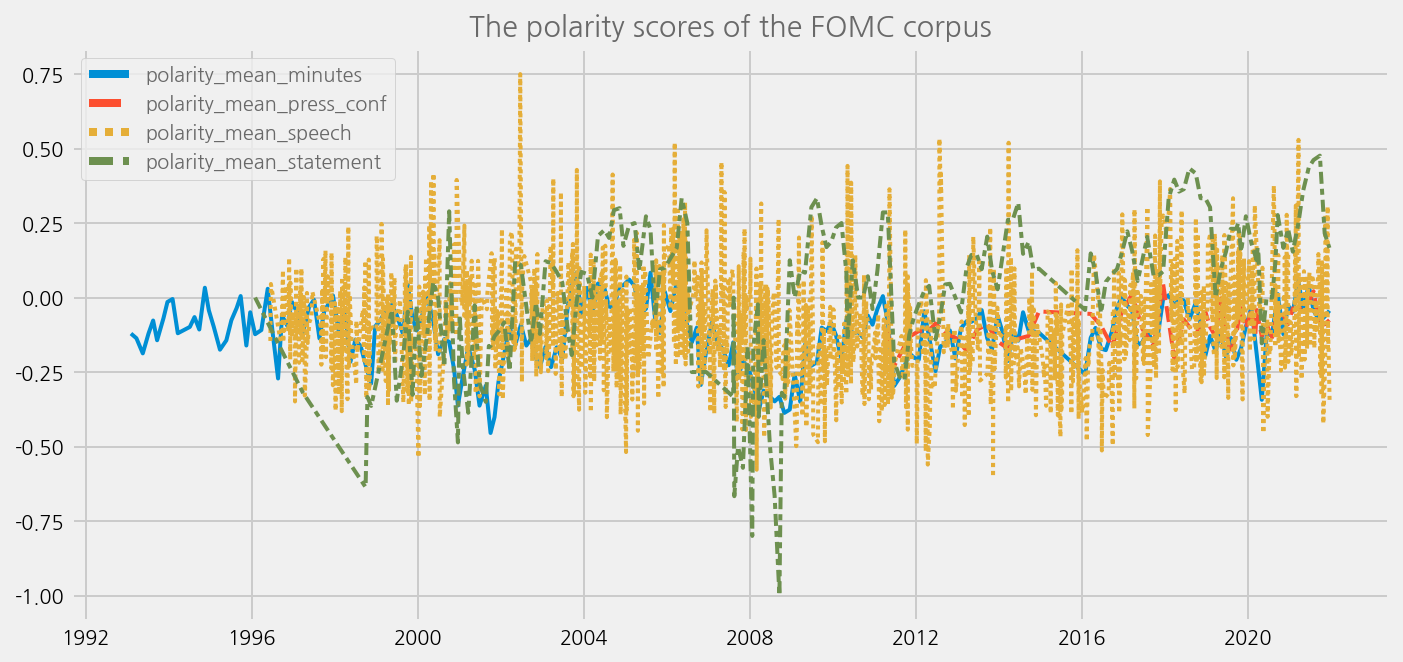

In [14]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = [
    "polarity_mean_minutes",
    "polarity_mean_press_conf",
    "polarity_mean_speech",
    "polarity_mean_statement",
]
cfg.ax.title = "The polarity scores of the FOMC corpus"
eKonf.instantiate(cfg, data=tone_data_lm)


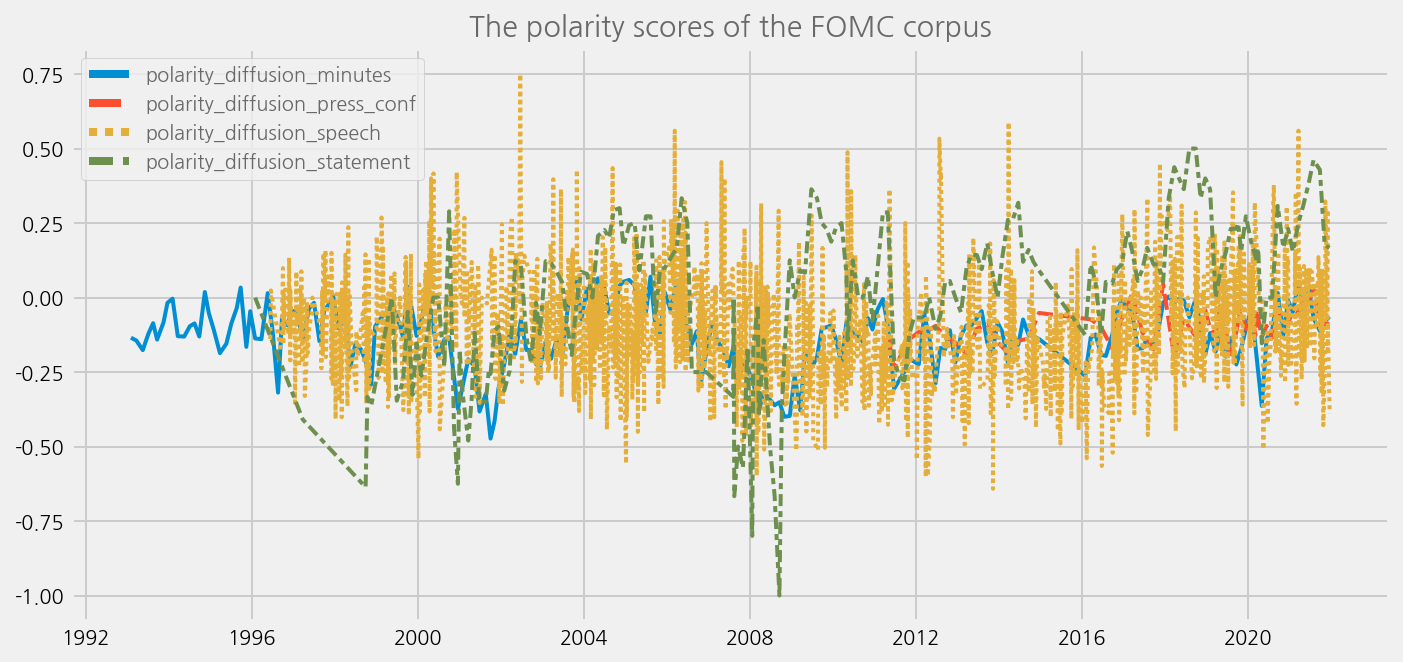

In [15]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = [
    "polarity_diffusion_minutes",
    "polarity_diffusion_press_conf",
    "polarity_diffusion_speech",
    "polarity_diffusion_statement",
]
cfg.ax.title = "The polarity scores of the FOMC corpus"
eKonf.instantiate(cfg, data=tone_data_lm)


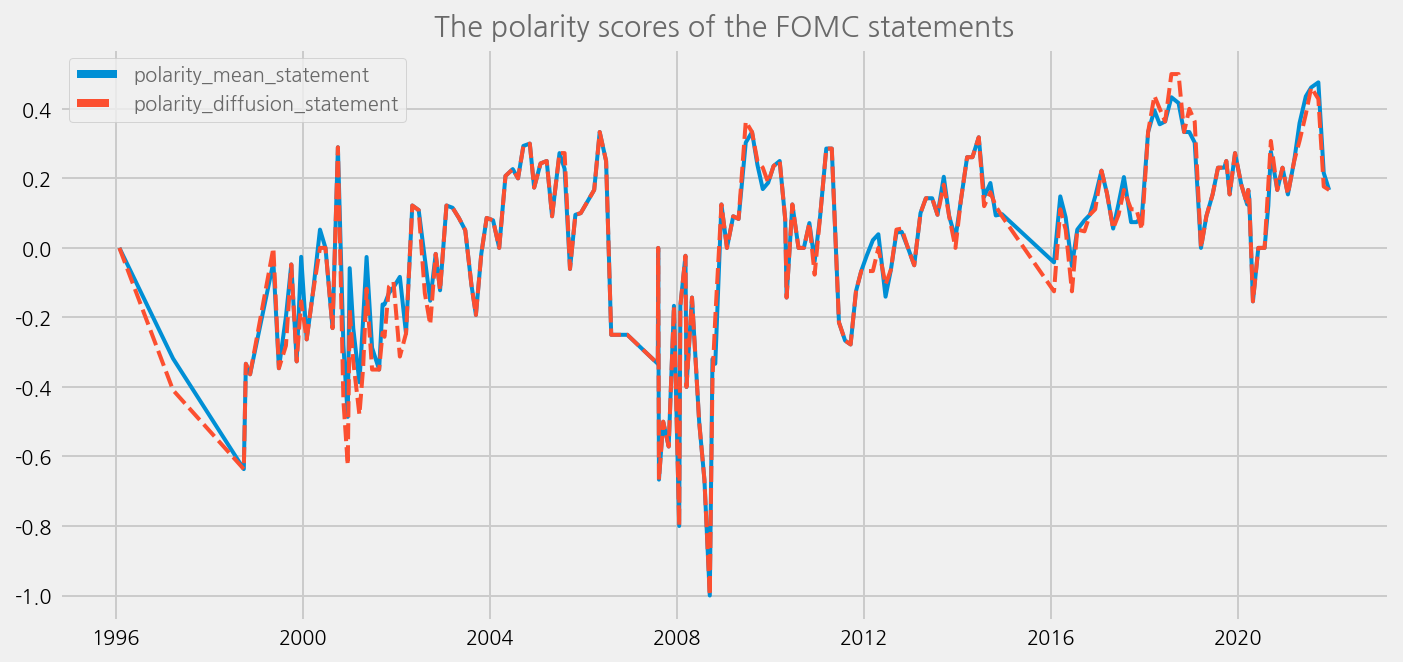

In [16]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = ["polarity_mean_statement", "polarity_diffusion_statement"]
cfg.ax.title = "The polarity scores of the FOMC statements"
eKonf.instantiate(cfg, data=tone_data_lm)


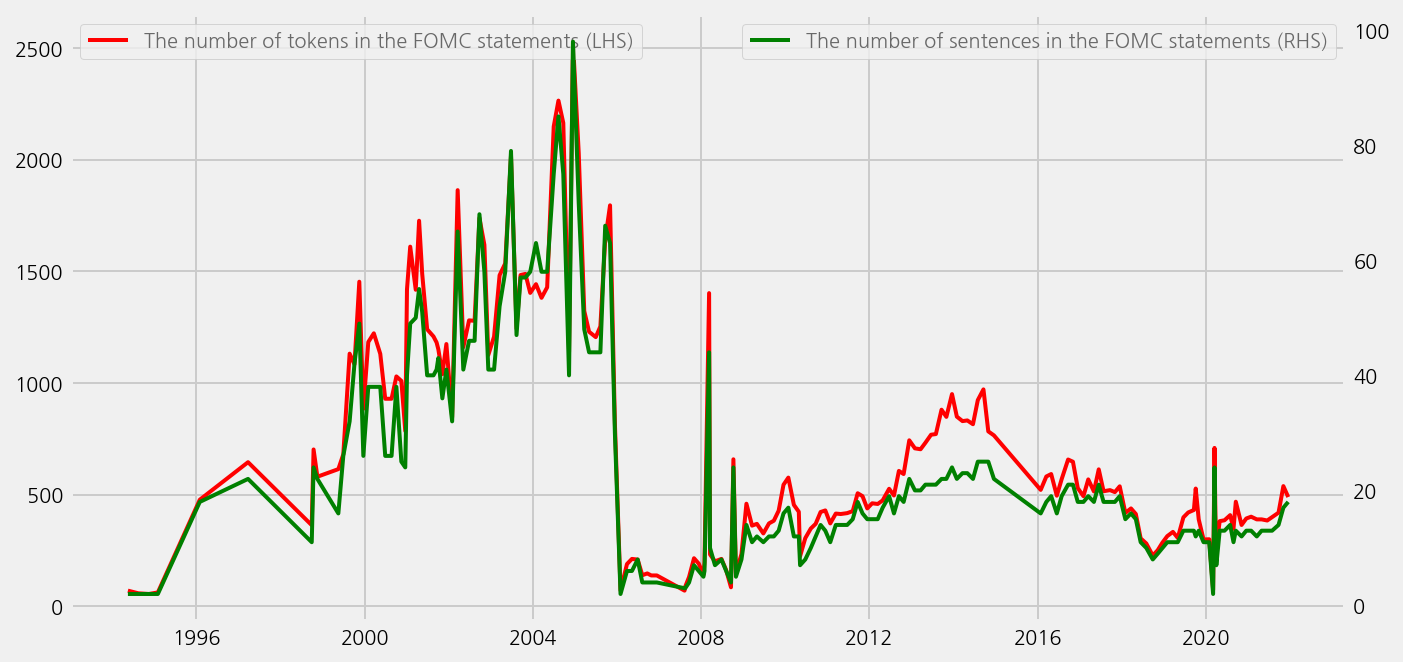

In [17]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "num_tokens_sum_statement"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "num_examples_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.plots[1].secondary_y = True
cfg.ax.legend = dict(
    labels=[
        "The number of tokens in the FOMC statements (LHS)",
    ],
    loc=2,
)
ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
ax2.legend = dict(
    labels=["The number of sentences in the FOMC statements (RHS)"],
    loc=1,
)
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=tone_data_lm)


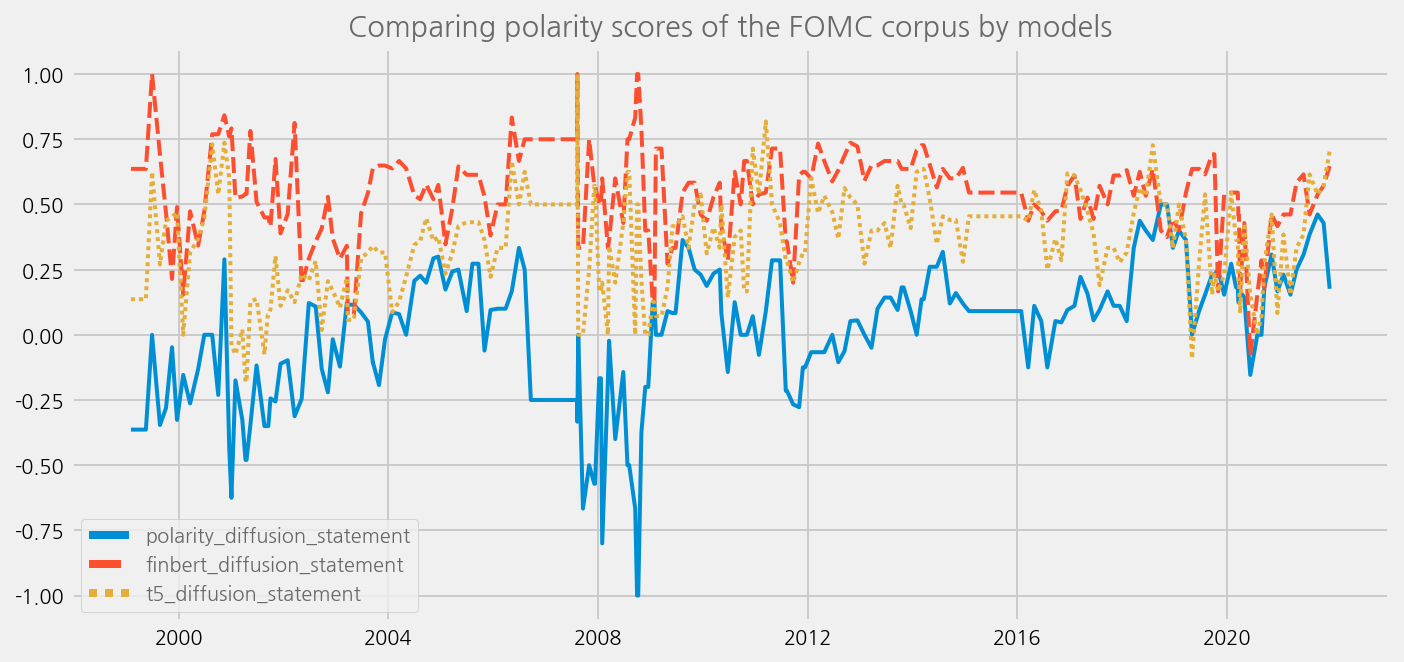

In [18]:
sentiments = [
    "polarity_diffusion_statement",
    "finbert_diffusion_statement",
    "t5_diffusion_statement",
]

cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = sentiments
cfg.ax.title = "Comparing polarity scores of the FOMC corpus by models"
eKonf.instantiate(cfg, data=merged_tone_data)


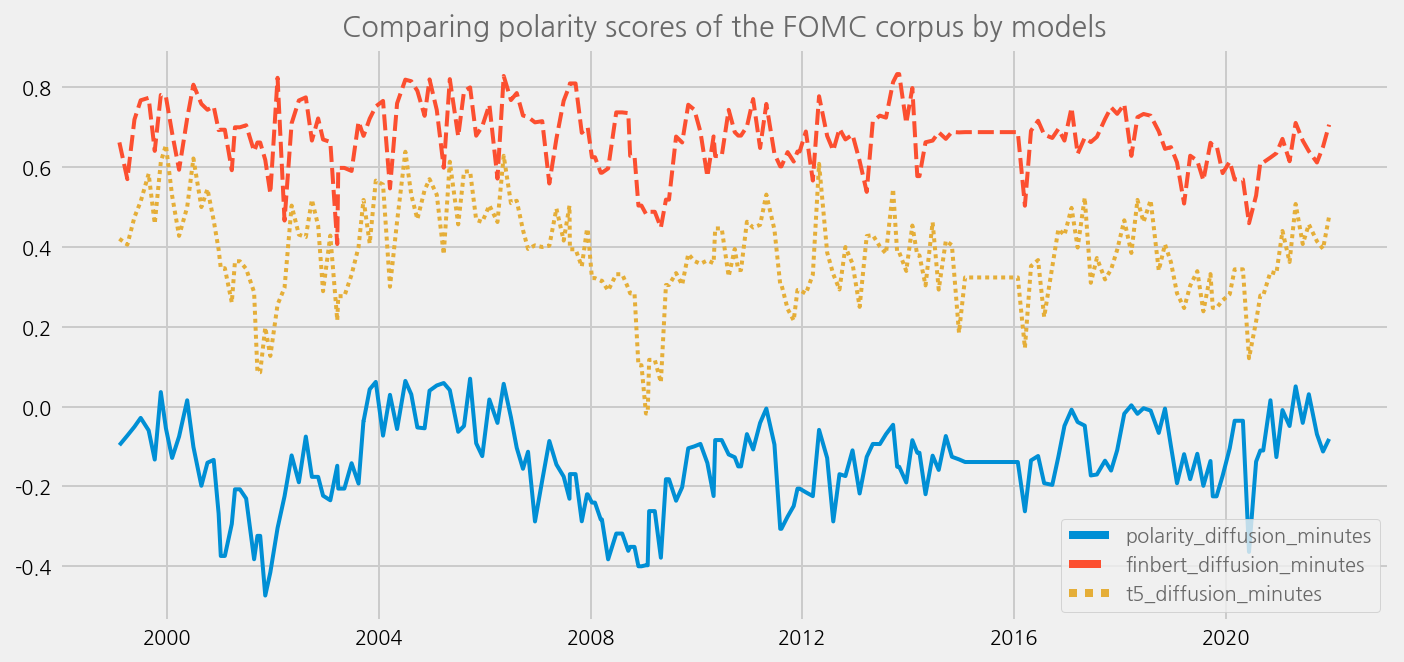

In [19]:
sentiments = [
    "polarity_diffusion_minutes",
    "finbert_diffusion_minutes",
    "t5_diffusion_minutes",
]

cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.y = sentiments
cfg.ax.title = "Comparing polarity scores of the FOMC corpus by models"
eKonf.instantiate(cfg, data=merged_tone_data)


### Plot the results and compare to the economical uncertainty / systemic risk periods


In [20]:
def plot_sentiments_over_crisis_periods(name="polarity_diffusion_statement", window=2):
    recessions = fomc.recessions.to_dict(orient="records")

    span_args = eKonf.compose("visualize/plot/ax/axvspan")
    annot_args = eKonf.compose("visualize/plot/ax/annotation")
    span_args.color = "crimson"
    span_args.alpha = 0.4

    spans = []
    annotations = []
    for span in recessions:
        annotation = span["name"]
        start = span["from_date"]
        end = span["to_date"]
        span = span_args.copy()
        span.xmin, span.xmax = eKonf.to_dateparm(start), eKonf.to_dateparm(end)

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y
        spans.append(span)
        annotations.append(annot)

    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()

    cfg = eKonf.compose("visualize/plot=lineplot")
    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].linewidth = 2.5
    cfg.plots[0].palette = "r"
    cfg.plots[1].y = name
    cfg.plots[1].linewidth = 1.5
    cfg.plots[1].palette = "g"
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend.labels = [
        f"{window} period MA",
        f"Polarity score of {name}",
    ]
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations
    eKonf.instantiate(cfg, data=merged_tone_data)


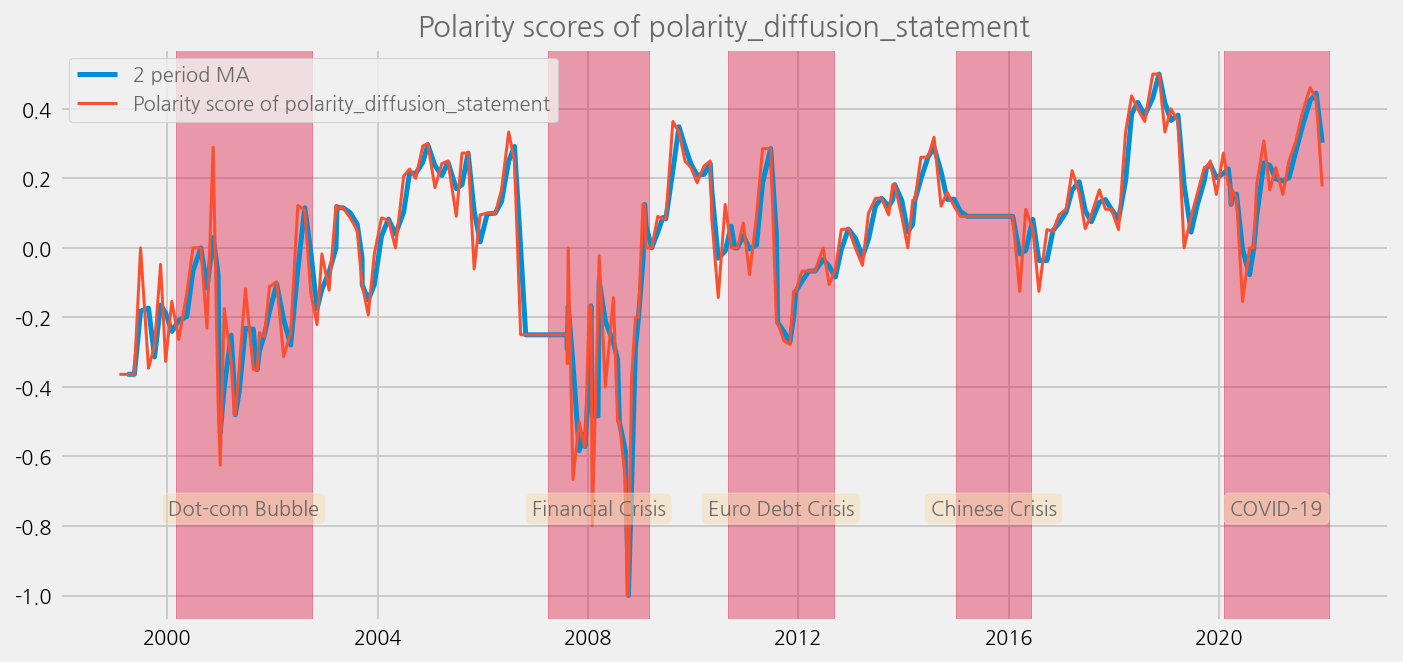

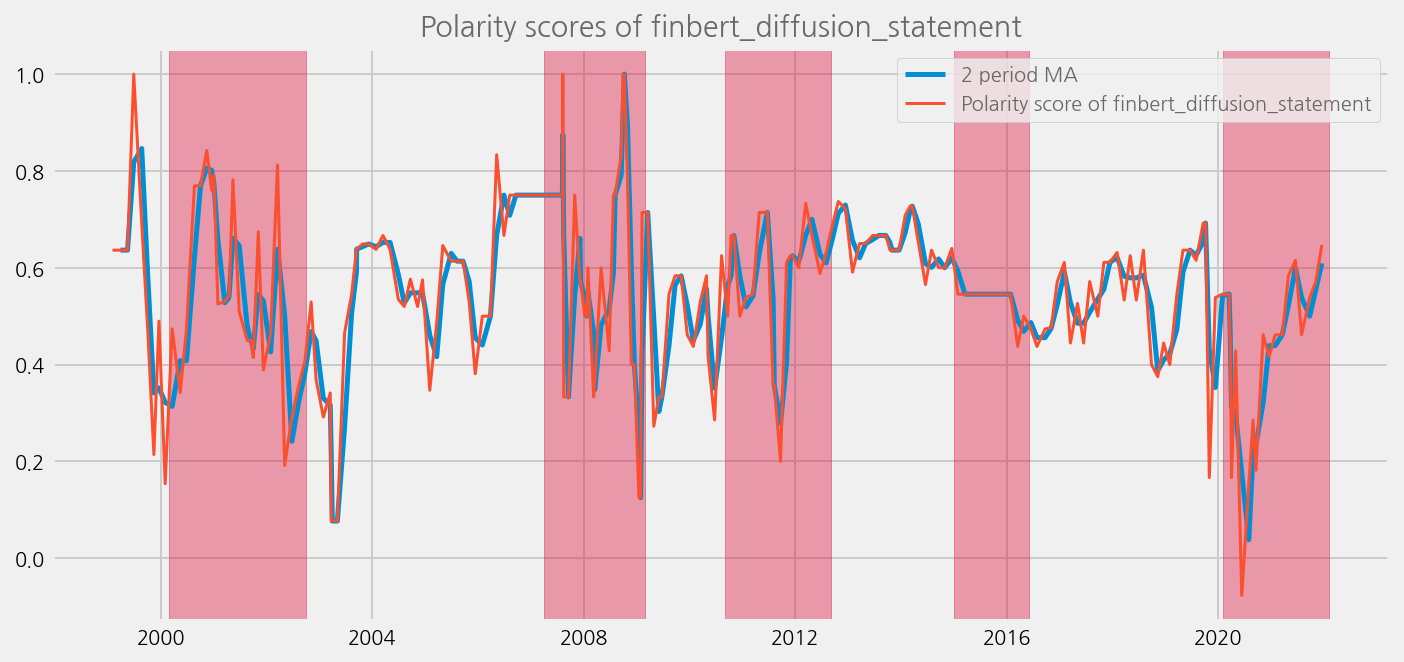

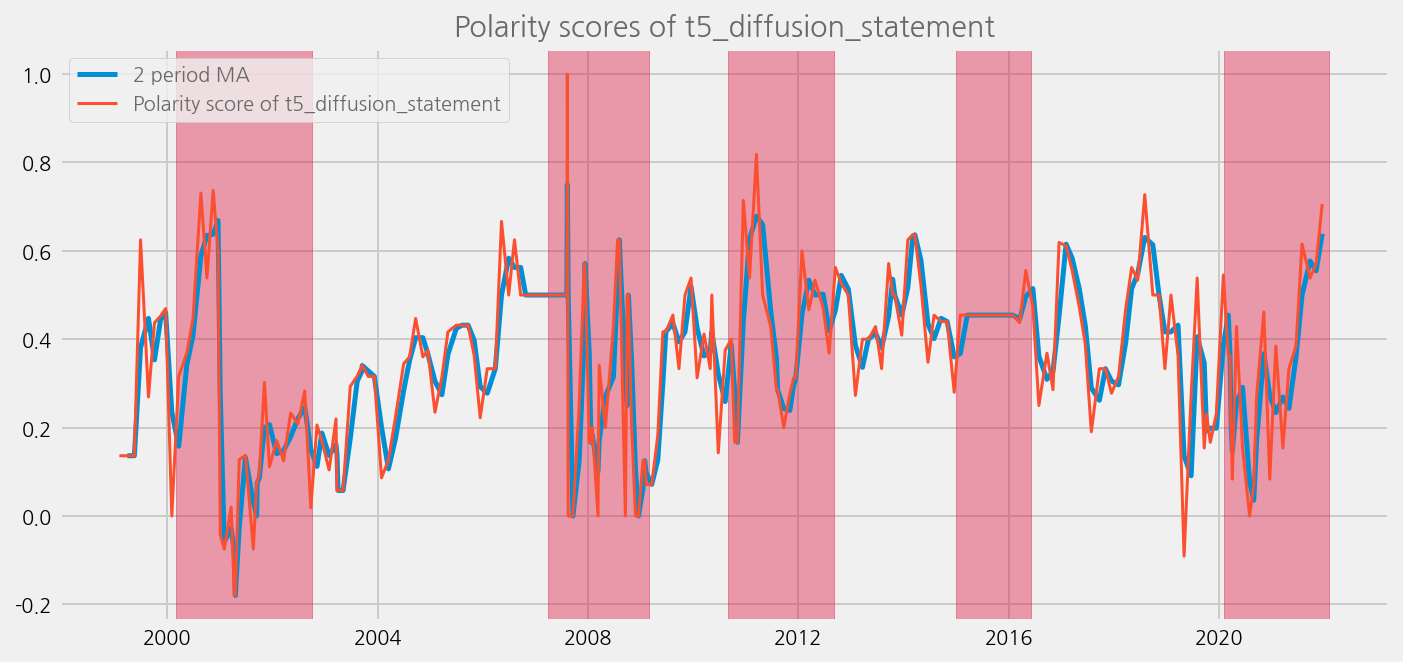

In [21]:
sentiments = [
    "polarity_diffusion_statement",
    "finbert_diffusion_statement",
    "t5_diffusion_statement",
]
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)


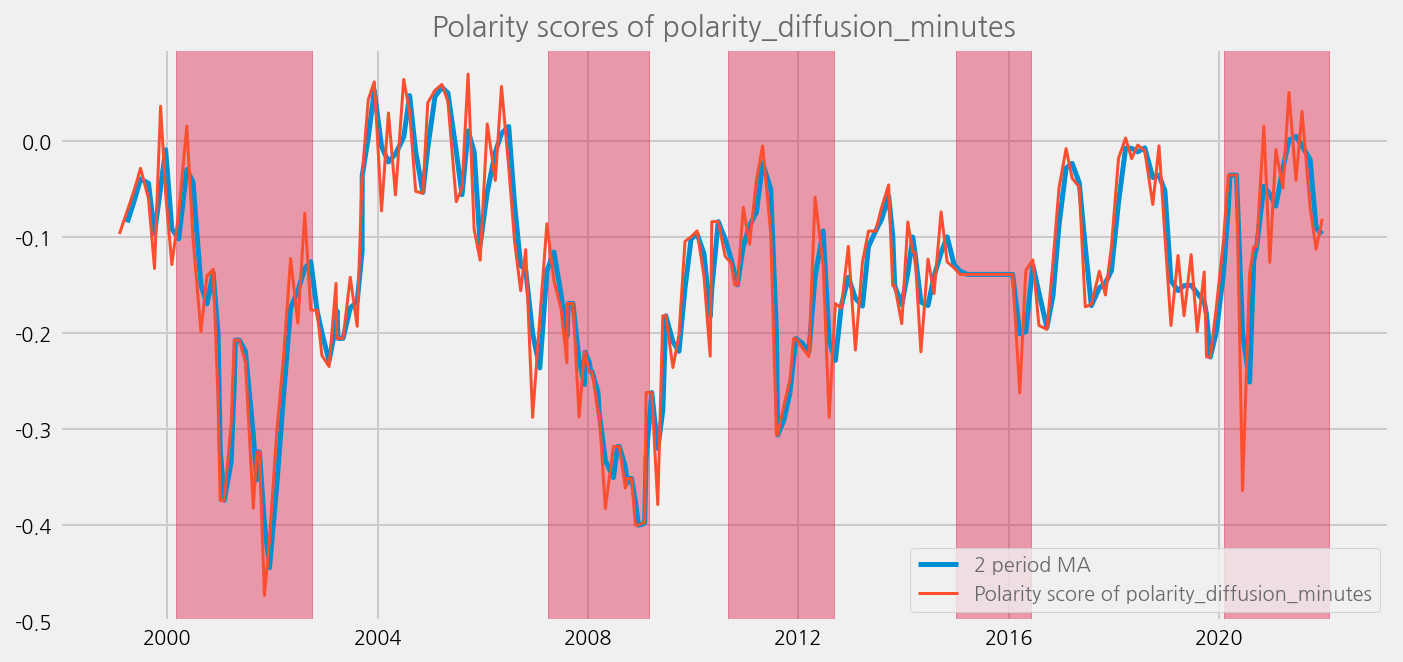

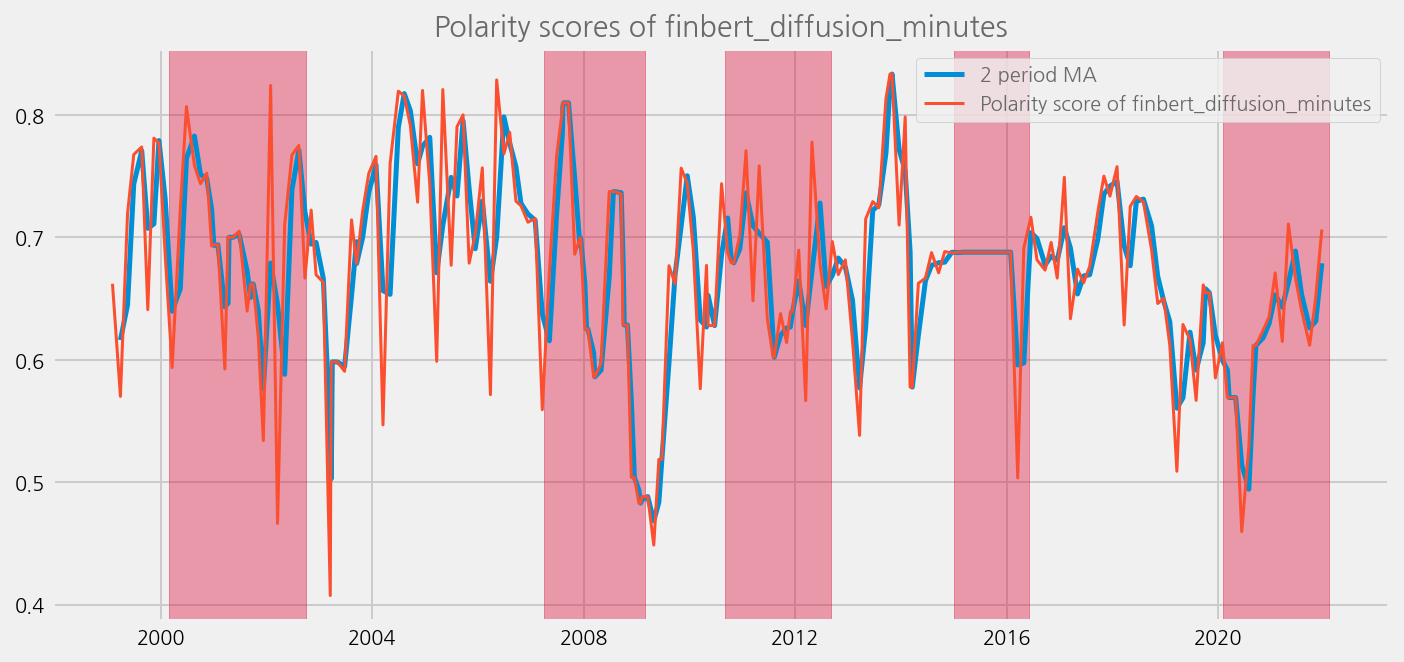

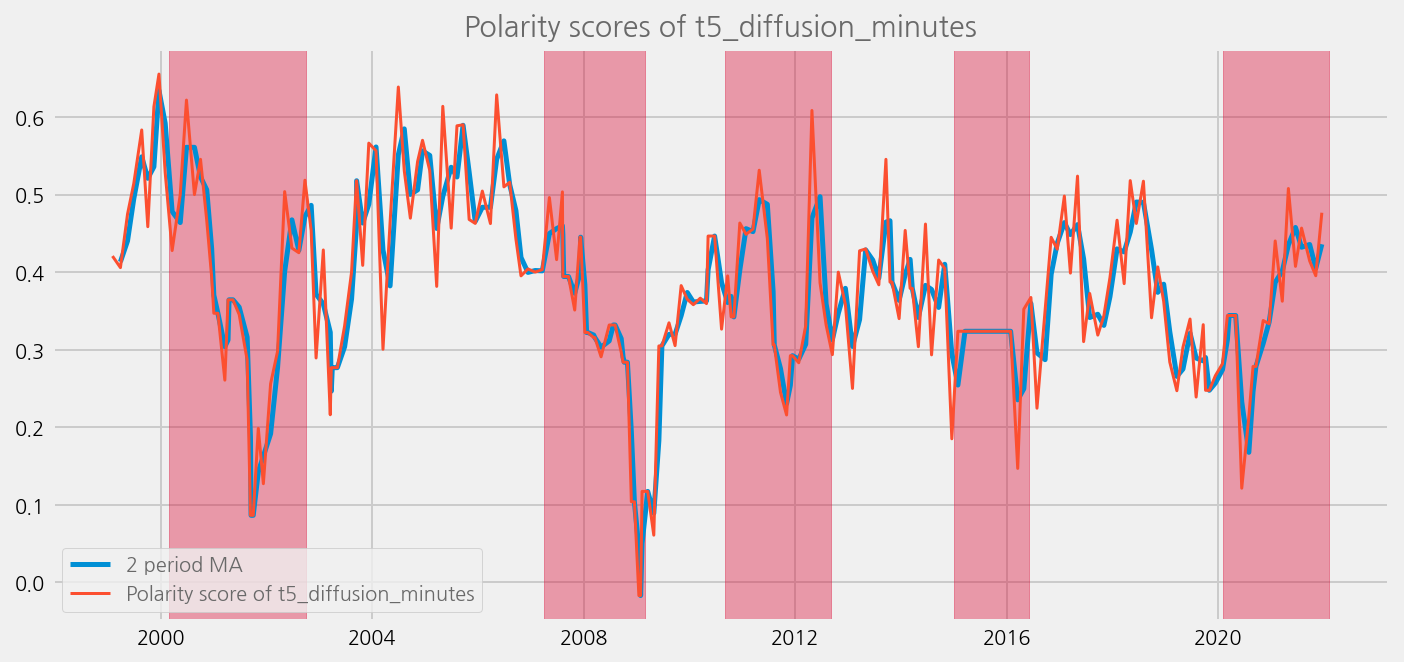

In [22]:
sentiments = [
    "polarity_diffusion_minutes",
    "finbert_diffusion_minutes",
    "t5_diffusion_minutes",
]
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)


In [23]:
from datetime import datetime

chair = fomc.chairpersons
chair = chair[chair.to_date.dt.year >= start_year]


def plot_sentiments_over_chair_periods(name="polarity_diffusion_statement", window=3):
    annot_args = eKonf.compose("visualize/plot/ax/annotation")

    spans = []
    annotations = []
    for row in chair.iterrows():
        row_num = row[0]
        start = row[1]["from_date"]
        if start.year < start_year:
            start = datetime(2000, 1, 1)
        end = row[1]["to_date"]
        annotation = row[1]["last_name"]
        color = "crimson" if row_num % 2 == 0 else "darkblue"
        alpha = 0.4 if row_num % 2 == 0 else 0.2
        span = {
            "xmin": eKonf.to_dateparm(start),
            "xmax": eKonf.to_dateparm(end),
            "alpha": alpha,
            "color": color,
        }

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y

        spans.append(span)
        annotations.append(annot)

    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()

    cfg = eKonf.compose("visualize/plot=lineplot")
    ax2 = cfg.ax.copy()

    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
    cfg.plots[1].y = name
    cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend = dict(
        labels=[
            f"{window} period MA",
            f"Polarity score of {name}",
        ],
        loc=2,
    )
    scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
    scatter_cfg.y = "rate"
    scatter_cfg.secondary_y = True
    scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
    cfg.plots.append(scatter_cfg)

    ax2.grid = False
    ax2.secondary_y = True
    ax2.ylim = "(-4, 10)"
    ax2.legend = dict(
        labels=["Fed Rate"],
        loc=1,
    )
    cfg.axes.append(ax2)
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations

    eKonf.instantiate(cfg, data=merged_tone_data)


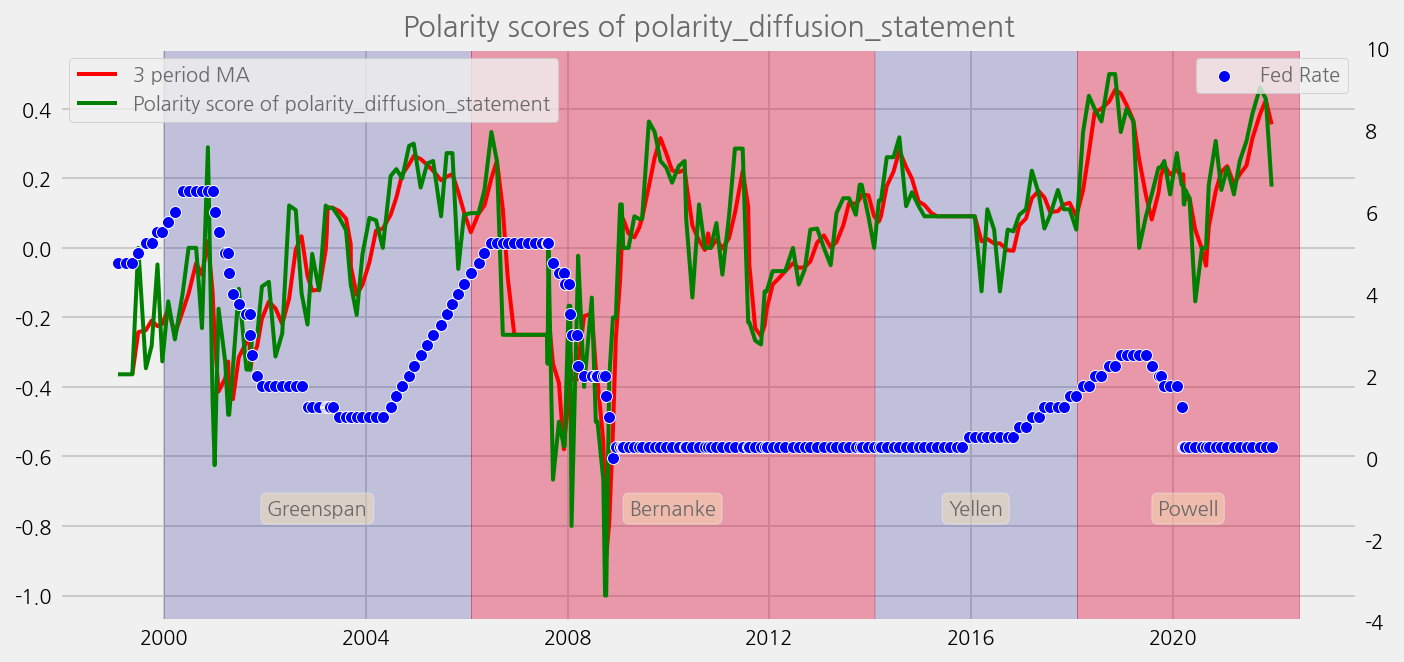

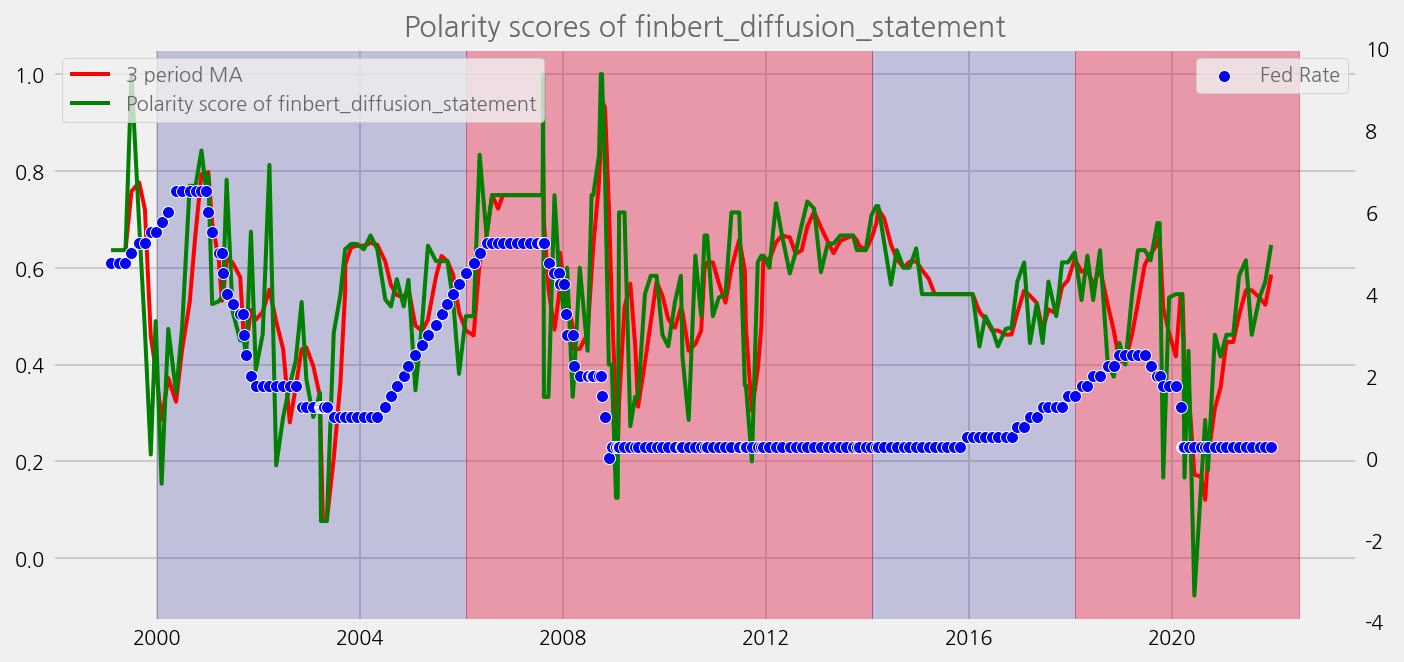

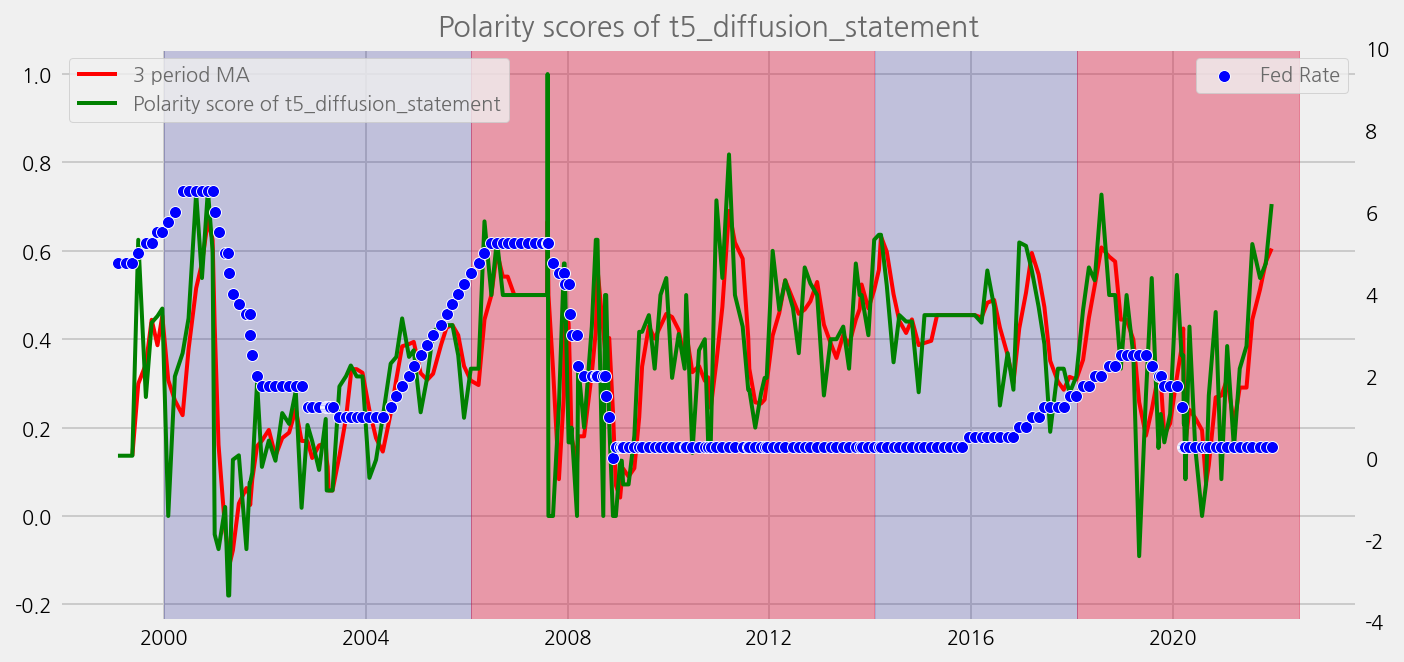

In [24]:
sentiments = [
    "polarity_diffusion_statement",
    "finbert_diffusion_statement",
    "t5_diffusion_statement",
]
for name in sentiments:
    plot_sentiments_over_chair_periods(name)


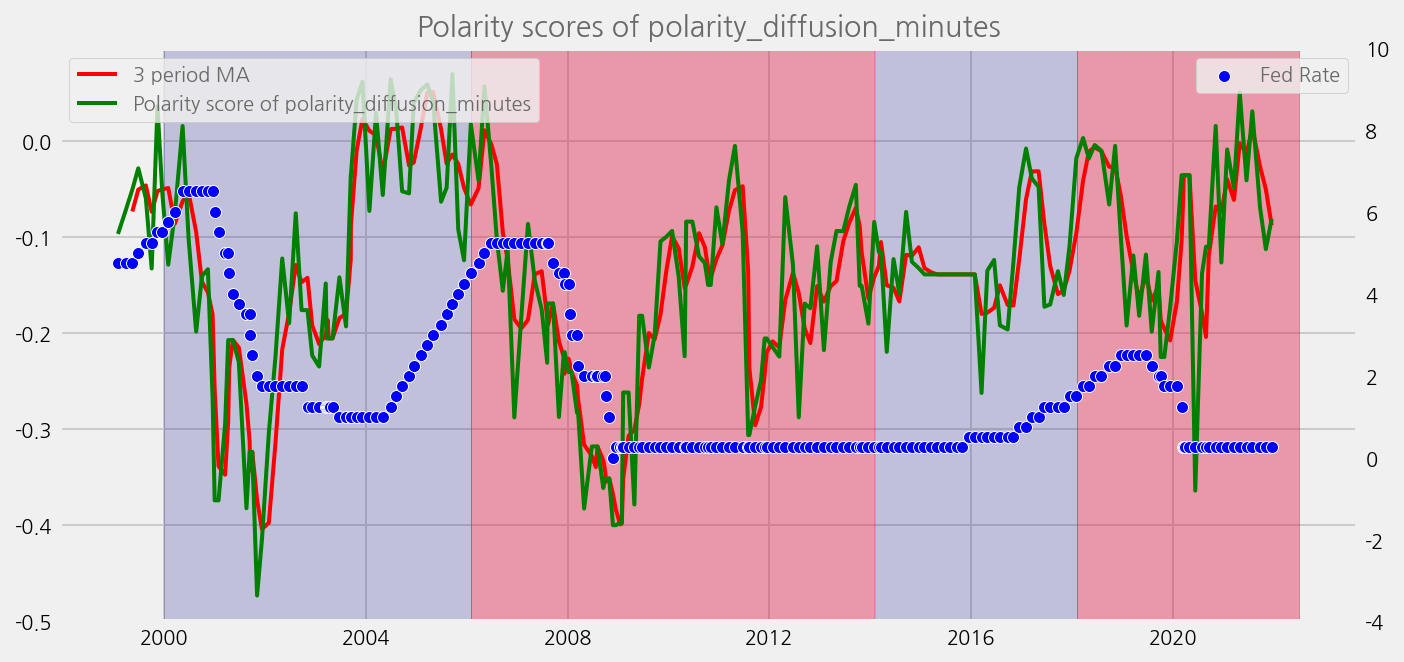

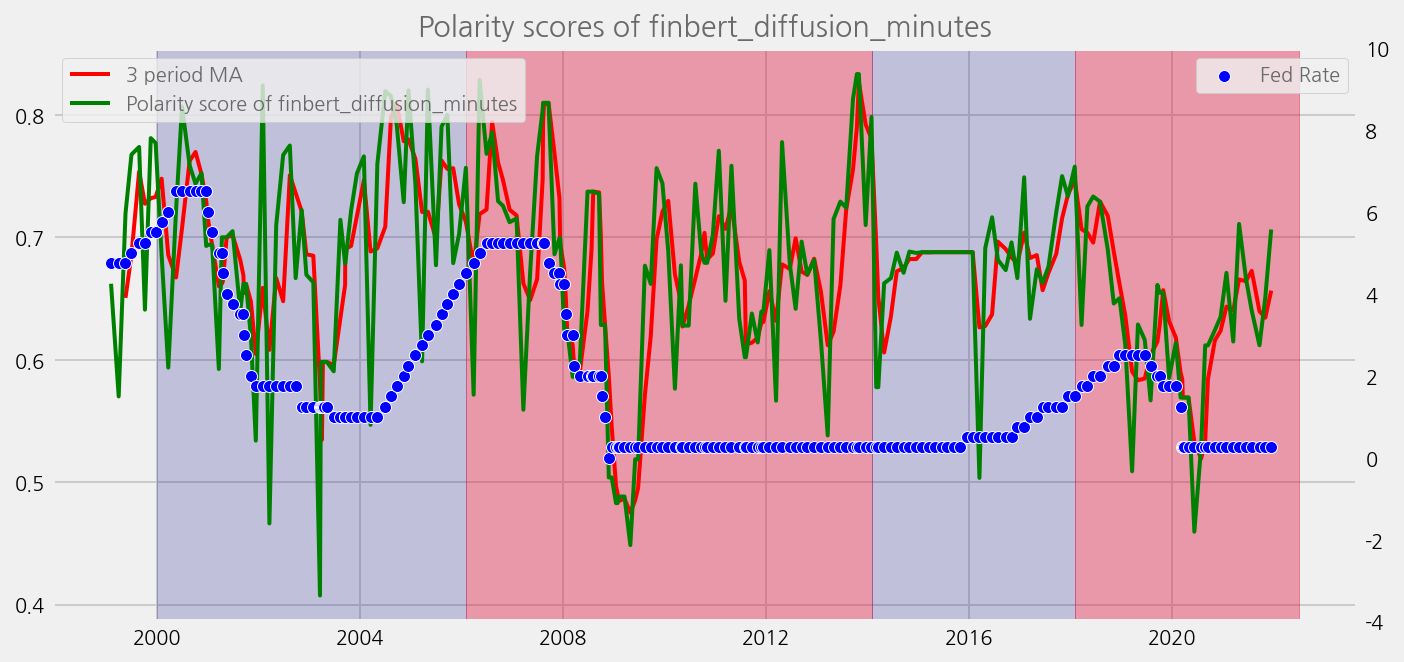

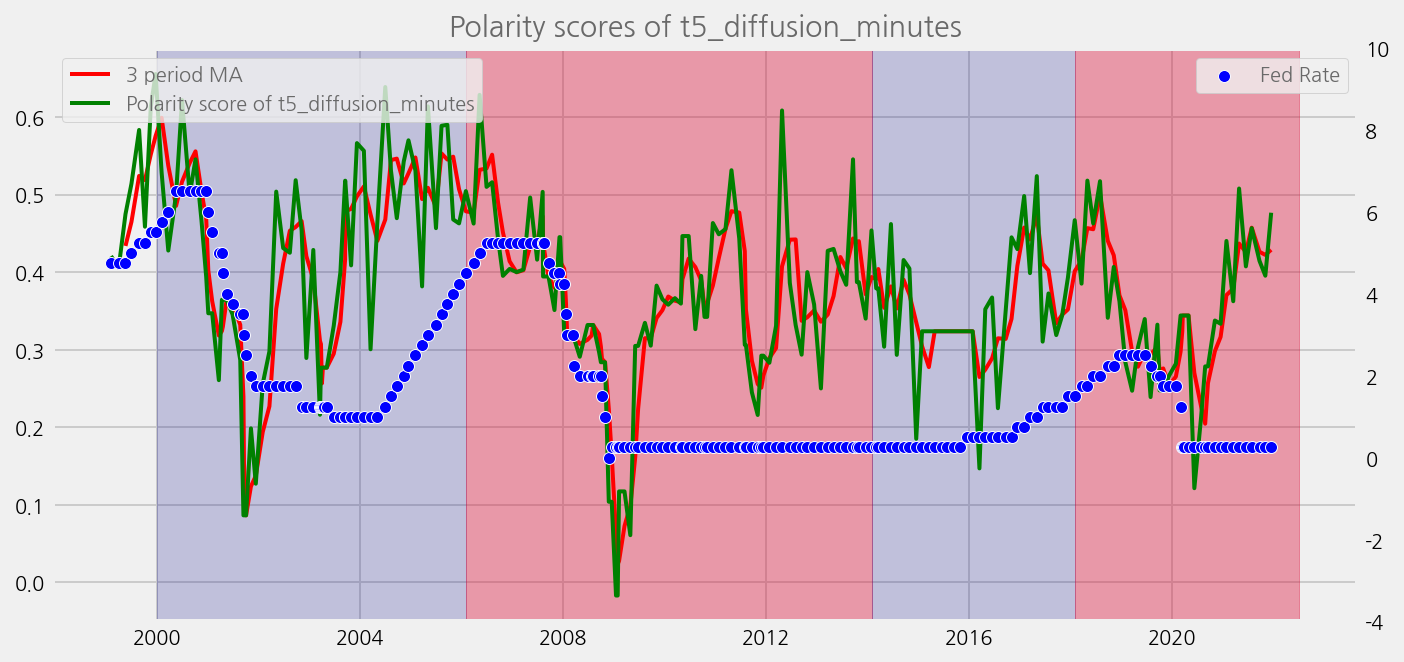

In [25]:
sentiments = [
    "polarity_diffusion_minutes",
    "finbert_diffusion_minutes",
    "t5_diffusion_minutes",
]
for name in sentiments:
    plot_sentiments_over_chair_periods(name)


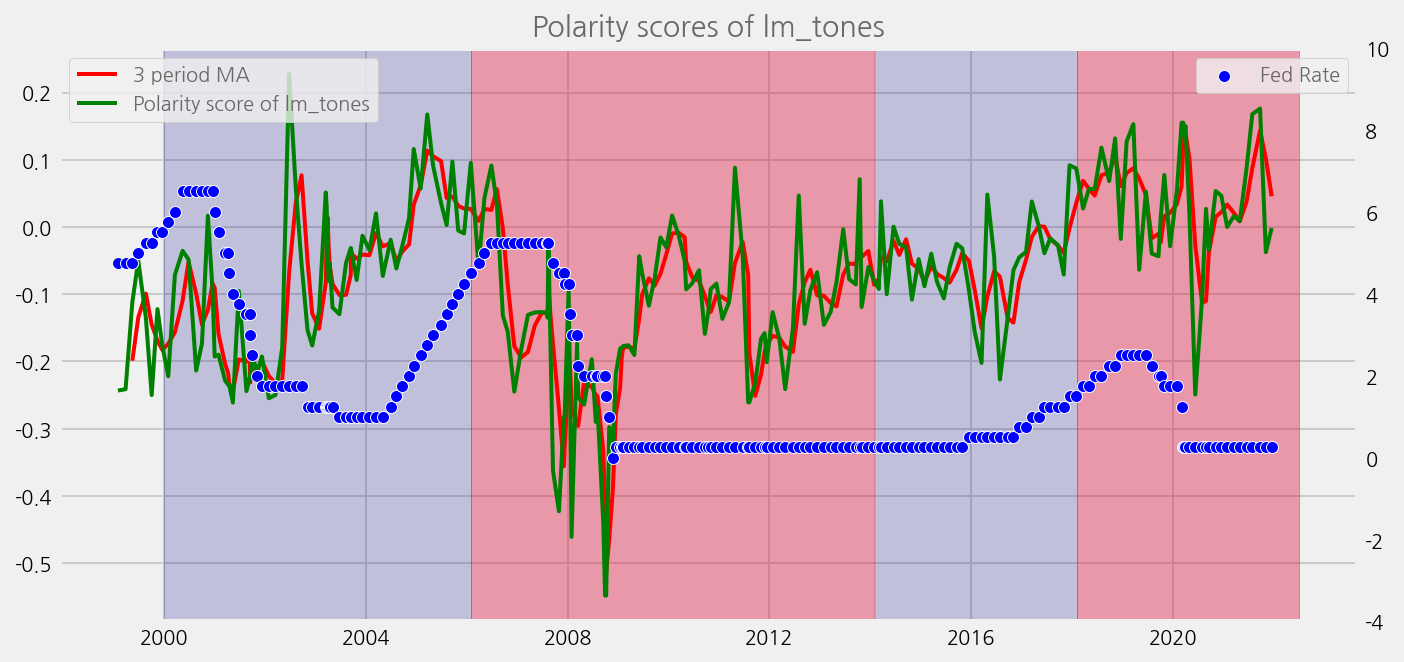

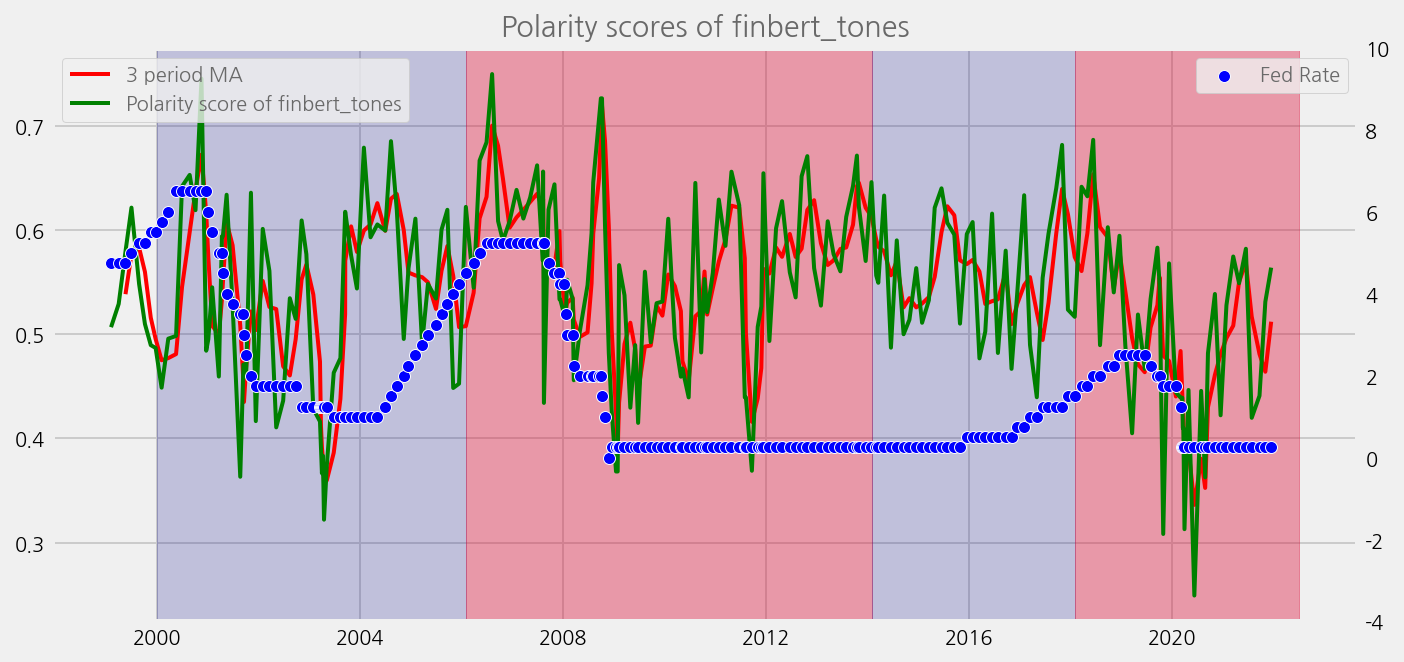

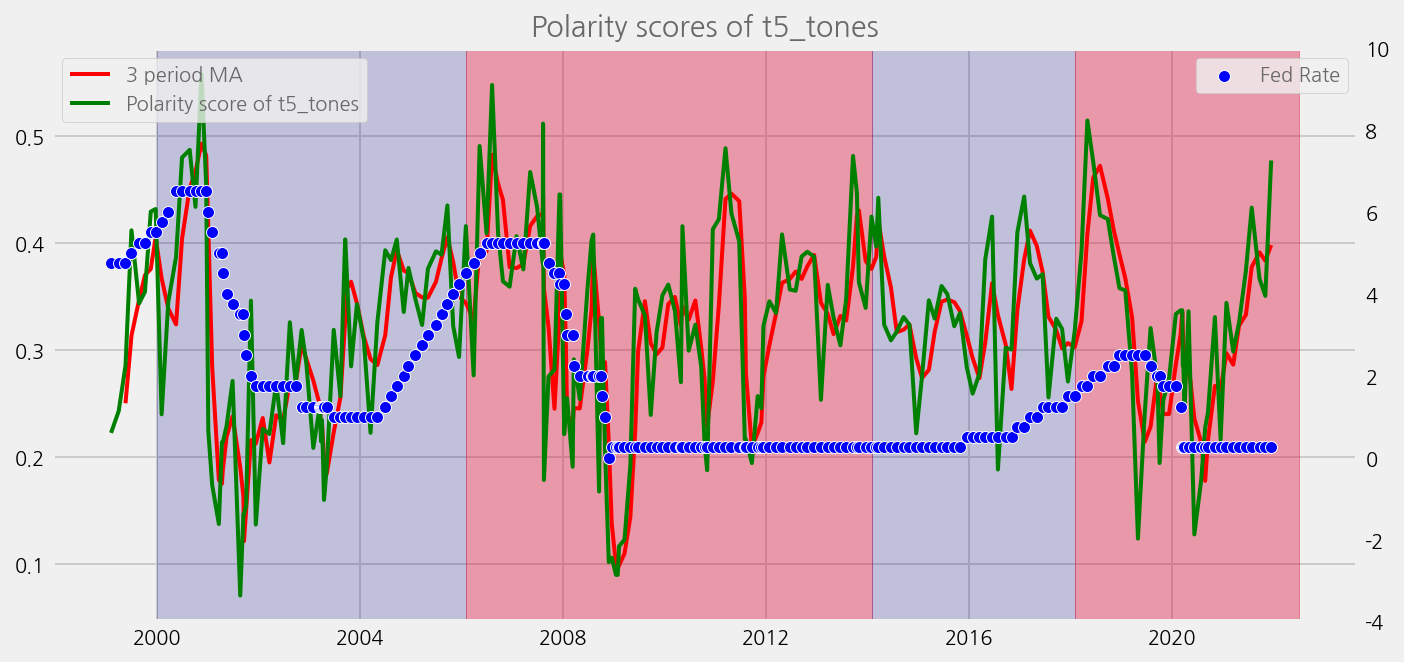

In [26]:
sentiments = ["lm_tones", "finbert_tones", "t5_tones"]
for name in sentiments:
    plot_sentiments_over_chair_periods(name)
